# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
import pandas as pd
import numpy as np

XLS1=pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\DATA601_tuesday\week12\imputation_homework_12.xlsx")
XLS1

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [2]:
XLS2=pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\DATA601_tuesday\week12\imputation_homework_32.xls")
XLS2

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [3]:
XLS3=pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\DATA601_tuesday\week12\imputation_homework_78.xlsx")
XLS3

,Unnamed: 0,date,value
0,0,2015-11-03,13.394304
1,1,2015-11-04,-3.800715
2,2,2015-11-05,28.098152
3,3,2015-11-06,20.500562
4,4,2015-11-07,33.981955
...,...,...,...
847,847,2018-02-27,14.469096
848,848,2018-02-28,30.466798
849,849,2018-03-01,13.722157
850,850,2018-03-02,16.117787


In [4]:
XLS1=pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\DATA601_tuesday\week12\imputation_homework_12.xlsx",index_col="Unnamed: 0")
XLS1

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00
...,...,...
103,6.55,35.75
104,6.60,36.00
105,6.65,36.25
106,6.70,36.50


In [5]:
XLS2=pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\DATA601_tuesday\week12\imputation_homework_32.xls",index_col="Unnamed: 0")
XLS2

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655
...,...,...
495,9.90,-2.938926
496,9.92,-0.506655
497,9.94,-0.665052
498,9.96,-2.419020


In [6]:
XLS3=pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\DATA601_tuesday\week12\imputation_homework_78.xlsx",index_col="Unnamed: 0")
XLS3

,date,value
0,2015-11-03,13.394304
1,2015-11-04,-3.800715
2,2015-11-05,28.098152
3,2015-11-06,20.500562
4,2015-11-07,33.981955
...,...,...
847,2018-02-27,14.469096
848,2018-02-28,30.466798
849,2018-03-01,13.722157
850,2018-03-02,16.117787


 # COUNT THE NUMBER OF MISSING VALUES 

In [7]:
XLS1.isnull().sum()

x    9
y    0
dtype: int64

In [8]:
XLS2.isnull().sum()

time      0
value    48
dtype: int64

In [9]:
XLS3.isnull().sum()

date      0
value    81
dtype: int64

# HISTOGRAM DISTRIBUTION 

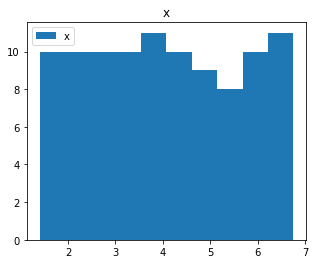

In [10]:
import matplotlib.pyplot as plt

XLS1.hist(column='x',
        grid=False,
        figsize=(5, 4),
        legend=True,
        orientation='vertical',
        );

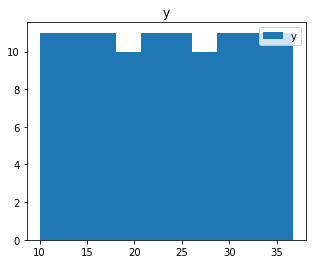

In [11]:
XLS1.hist(column='y',
        grid=False,
        figsize=(5, 4),
        legend=True,
        orientation='vertical',
        );

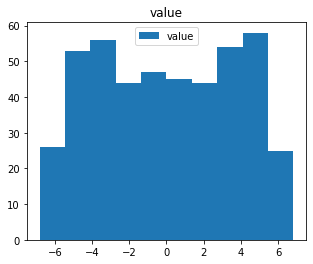

In [12]:
XLS2.hist(column='value',
        grid=False,
        figsize=(5,4),
        legend=True,
        orientation='vertical',
        );

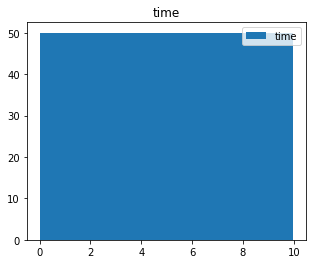

In [13]:
XLS2.hist(column='time',
        grid=False,
        figsize=(5,4),
        legend=True,
        orientation='vertical',
        );

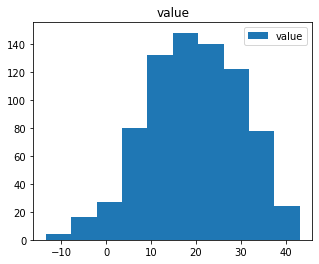

In [14]:
XLS3.hist(column='value',
        grid=False,
        figsize=(5,4),
        legend=True,
        orientation='vertical',
        );

# CREATING  LAG PLOT 

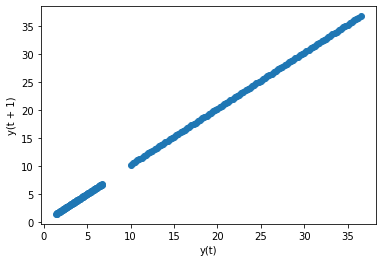

In [15]:
pd.plotting.lag_plot(XLS1, lag=1);

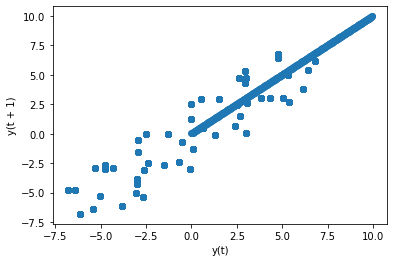

In [16]:
pd.plotting.lag_plot(XLS2, lag=1);

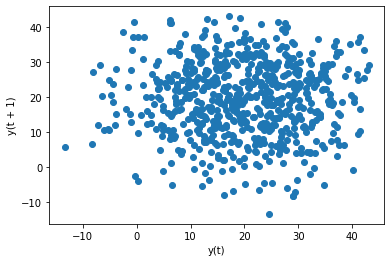

In [17]:
pd.plotting.lag_plot(XLS3['value']);

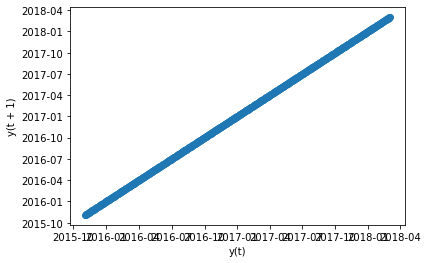

In [18]:
pd.plotting.lag_plot(XLS3['date']);

#### DESCRIPTION ABOUT LAGPLOT
>A lag plot checks whether a data set or time series is random or not.
Random dots usually doesn't represent any structure in the lagplot and we cannot predict the next value in the column in case of random dots.
>In case of Non-Random dots usually represent a fixed structure in the lagplot and we can predict the next coming value in the column in case of non-random dots.

1)Data in the first excel file represents non-random dots

2)Data in the second excel file represents random data of the value column

3)Data in the second excel file represents non-random data of the  time column

4)Data in the third excel file represents non-random data of the date column

5)Data in the third excel file represents random data of the value column

# INTERPOLATION 

In [19]:
XLS1.x.replace(np.nan,'NaN',inplace=True)

In [20]:
XLS1.x.unique()

array([1.4, 1.45, 1.5, 1.55, 1.6, 'NaN', 1.7, 1.75, 1.8, 1.85, 1.9, 1.95,
       2.0, 2.100000000000001, 2.15, 2.200000000000001, 2.250000000000001,
       2.300000000000001, 2.350000000000001, 2.400000000000001,
       2.450000000000001, 2.500000000000001, 2.550000000000001,
       2.600000000000001, 2.650000000000001, 2.700000000000001,
       2.750000000000001, 2.800000000000001, 2.900000000000001,
       2.950000000000001, 3.000000000000001, 3.050000000000002,
       3.100000000000001, 3.150000000000001, 3.200000000000002,
       3.250000000000002, 3.300000000000002, 3.350000000000001,
       3.400000000000002, 3.450000000000002, 3.500000000000002,
       3.550000000000002, 3.600000000000002, 3.650000000000002,
       3.700000000000002, 3.750000000000002, 3.800000000000002,
       3.850000000000002, 3.900000000000002, 3.950000000000002,
       4.000000000000002, 4.050000000000002, 4.100000000000002,
       4.150000000000002, 4.200000000000003, 4.300000000000002,
       4.3500000000

In [21]:
XLS1.x[:100]

0      1.4
1     1.45
2      1.5
3     1.55
4      1.6
      ... 
95    6.15
96     NaN
97    6.25
98     6.3
99    6.35
Name: x, Length: 100, dtype: object

In [22]:
XLS1.interpolate()

,x,y
0,1.4,10.00
1,1.45,10.25
2,1.5,10.50
3,1.55,10.75
4,1.6,11.00
...,...,...
103,6.55,35.75
104,6.6,36.00
105,6.65,36.25
106,6.7,36.50


In [23]:
XLS1.isnull().sum()

x    0
y    0
dtype: int64

In [24]:
XLS2.value.replace(np.nan,'NaN',inplace=True)

In [25]:
XLS2.value.unique()

array([0.0, 2.5287792004118286, 2.4190199404092203, 0.6650522588384435,
       0.5066553379182692, 2.9389262614623655, 5.3248485622337505,
       5.028136718463893, 3.0460691229251298, 'NaN', 4.755282581475766,
       6.81354928623375, 3.814563137556413, 3.009323221053136,
       6.426248294920404, 5.397210132095022, 1.5206224970531363,
       2.9389262614623646, 4.310881403098884, 3.0161932680083385,
       -1.2754468647687853, -1.83697019872103e-15, -0.06787893123932687,
       -3.016193268008336, -4.310881403098883, -2.938926261462368,
       -1.5206224970531375, -2.6769957092939984, -5.3972101320950205,
       -6.426248294920407, -4.755282581475757, -3.0093232210531373,
       -3.8145631375564086, -6.165704146726301, -6.8135492862337514,
       -4.755282581475772, -3.046069122925128, -5.028136718463891,
       -5.324848562233754, -2.938926261462371, -0.5066553379182708,
       -0.6650522588384506, -2.4190199404092194, -2.528779200411832,
       -6.123233995736766e-15, 2.52877920041

In [26]:
XLS2.interpolate()

,time,value
0,0.00,0
1,0.02,2.52878
2,0.04,2.41902
3,0.06,0.665052
4,0.08,0.506655
...,...,...
495,9.90,-2.93893
496,9.92,-0.506655
497,9.94,-0.665052
498,9.96,-2.41902


In [27]:
XLS2.value[:100]

0            0
1      2.52878
2      2.41902
3     0.665052
4     0.506655
        ...   
95    -2.93893
96   -0.506655
97   -0.665052
98    -2.41902
99    -2.52878
Name: value, Length: 100, dtype: object

In [28]:
XLS2.isnull().sum()

time     0
value    0
dtype: int64

In [29]:
XLS3.value.replace(np.nan,'NaN',inplace=True)

In [30]:
XLS3.value.unique()

array([13.39430395943768, -3.800715003954167, 28.09815224865972,
       20.50056215948146, 33.98195476658137, 14.16976260187337,
       20.91615450549683, 24.27269978827026, 26.3119030712411,
       41.50927108949857, 37.3027138542863, 15.46360963769365,
       32.05580339342758, 'NaN', 28.52134731884023, 31.03081278430244,
       11.62517137176265, 9.694257690463619, 19.84971949394425,
       35.82167951606947, 16.33561832999456, 22.16048636105176,
       0.8500188584609845, 14.89190704732553, 24.22582221066767,
       17.62992945827096, 18.80294300905889, 17.85943388625979,
       8.899153726098678, 19.70658007412035, 15.38825377143652,
       18.17695502272152, 7.406368389820177, 26.34642518275071,
       33.81781682278874, 25.04286854506832, -4.463429634955041,
       23.70400952807361, 31.38929469994647, 21.29929371923012,
       29.35168737609388, 27.06547432547596, 1.160701896203193,
       15.2482442217594, 40.26189536406149, 19.65807299739717,
       13.79529924215046, 8.44694

In [31]:
XLS3.interpolate()

,date,value
0,2015-11-03,13.3943
1,2015-11-04,-3.80072
2,2015-11-05,28.0982
3,2015-11-06,20.5006
4,2015-11-07,33.982
...,...,...
847,2018-02-27,14.4691
848,2018-02-28,30.4668
849,2018-03-01,13.7222
850,2018-03-02,16.1178


In [32]:
XLS3.value[:100]

0      13.3943
1     -3.80072
2      28.0982
3      20.5006
4       33.982
        ...   
95     13.6354
96     16.2953
97     25.6084
98     13.6448
99    0.243318
Name: value, Length: 100, dtype: object

In [33]:
XLS3.isnull().sum()

date     0
value    0
dtype: int64